# Quick linear fit example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Regre_slope.csv', index_col='TIME')
#print(df.head())
for col in df.columns[:-1]:
    print(col) 

csd_r_a
css_r_a
eng_r_a
fin_r_a
hea_r_a
ind_r_a
mat_r_a
tec_r_a
tel_r_a
utl_r_a


In [3]:
x = np.arange(0.1, 1.3, 0.1)
y = df[str(col)].values

In [4]:
# x = np.arange(0, 240)
# np.random.seed(42)
# y = 3 * x + np.random.random(240)
# plt.plot(x[:12], y[:12], "o-")
# plt.show()

## Loop fit

In [5]:
i = 0
slopes = []
while i < len(y) - 12:
    x_temp = x
    y_temp = y[i:i+12]
    fit = np.polyfit(x_temp, y_temp, 1)
    slope_temp = fit[0]
    slopes.append(slope_temp)
    i += 1
##format converting
slopes = np.array(slopes)

In [6]:
#print(slopes)
print(len(slopes))

269


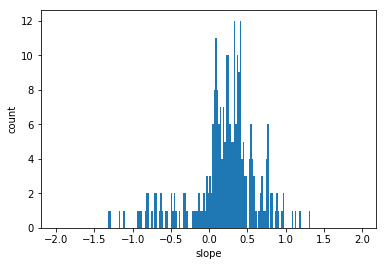

In [7]:
plt.clf()
plt.hist(slopes, bins=np.arange(-2, 2, 0.02))
plt.xlabel("slope")
plt.ylabel("count")
#plt.legend()
plt.show()

## One pipleline code

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data/Regre_slope.csv', index_col='TIME')
#print(df.head())

df_slope = pd.DataFrame()

for col in df.columns[:-1]:
    x = np.arange(0.1, 1.3, 0.1)
    y = df[str(col)].values
    
    slopes = []
    i = 12
    while i <= len(y):
        x_temp = x
        y_temp = y[i-12:i]
        fit =  np.polyfit(x_temp, y_temp, 1)
        slope_temp = fit[0]
    #     print("i", i, "slopes", slopes, "slope_temp", slope_temp)
    #     print("slopes", type(slopes))
        slopes.append(slope_temp)
        i += 1
        # endwhile
    #formating converting
    slopes = np.array(slopes)
    df_slope[str(col)] = slopes 
    
    # endfor
    
print(df_slope.head())



    csd_r_a   css_r_a   eng_r_a   fin_r_a   hea_r_a   ind_r_a   mat_r_a  \
0  0.155759  0.330748  0.184280  0.451657  0.466990  0.290563  0.193397   
1  0.142965  0.341119  0.178713  0.465651  0.527273  0.291605  0.166832   
2  0.140797  0.346021  0.174920  0.478766  0.542164  0.297115  0.147827   
3  0.160524  0.332129  0.201150  0.463985  0.531976  0.306731  0.168336   
4  0.171332  0.307126  0.236566  0.419612  0.486741  0.315832  0.178559   

    tec_r_a   tel_r_a   utl_r_a  
0  0.447472  0.368564  0.225870  
1  0.343374  0.408357  0.255431  
2  0.275385  0.401036  0.251754  
3  0.170147  0.358883  0.218927  
4  0.149290  0.321575  0.174318  


## More data

In [2]:
!mv ~/Downloads/regre.csv .

In [25]:
df = pd.read_csv('regre.csv')

In [29]:
print(df.head(), df.shape)

   sec_id   acu_ret       date
0    1003  1.000000  1/31/1990
1    1003  1.046843  2/28/1990
2    1003  1.054990  3/31/1990
3    1003  1.016700  4/30/1990
4    1003  1.082294  5/31/1990 (170691, 3)


In [30]:
df_new = df.pivot(index='date', columns='sec_id', values='acu_ret')

In [33]:
df_new.head()

sec_id,1003,1022,1032,1059,1080,1097,1102,1111,1122,1128,...,658900,658901,679377,693289,696797,732977,787494,790427,869154,988636
date,,,,,,,,,,,,,,,,,,,,,
1/31/1990,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/31/1991,1.080740,0.992863,1.652777,NaN,NaN,1.502500,1.367647,NaN,1.161414,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/31/1992,1.102624,0.963460,1.946570,NaN,NaN,1.572002,2.045565,NaN,0.728481,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/31/1993,1.300776,1.215040,1.804401,NaN,NaN,1.948832,1.797404,NaN,1.239618,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/31/1994,1.423225,0.986909,1.005496,NaN,NaN,2.169769,1.978750,1.056872,1.364586,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_new.describe()

sec_id,1003,1022,1032,1059,1080,1097,1102,1111,1122,1128,...,658900,658901,679377,693289,696797,732977,787494,790427,869154,988636
count,322.000000,84.000000,341.000000,1.0,90.000000,197.000000,341.000000,104.000000,341.000000,20.000000,...,1.0,19.000000,18.000000,17.000000,17.000000,14.000000,11.000000,10.000000,9.000000,2.000000
mean,3.256222,0.976363,28.921116,1.0,1.139580,2.593909,9.441365,0.824709,6.123079,0.729395,...,1.0,1.258785,0.782790,1.183747,0.893692,1.199668,0.889519,0.990538,1.004832,1.049364
std,1.843542,0.136394,43.979972,NaN,0.339669,0.894858,7.107491,0.166437,5.966505,0.376819,...,NaN,0.189762,0.195896,0.116987,0.070185,0.137451,0.094798,0.096503,0.060637,0.069811
min,0.883245,0.696180,0.413200,1.0,0.057308,0.986987,0.986538,0.506020,0.689801,0.041622,...,1.0,0.929217,0.504503,1.000000,0.768293,1.000000,0.727459,0.825478,0.923363,1.000000
25%,1.741841,0.886933,1.200247,1.0,0.998818,2.051836,4.030298,0.688168,1.618846,0.557817,...,1.0,1.181137,0.607482,1.072064,0.848900,1.064864,0.835313,0.913220,0.941556,1.024682
50%,2.644829,0.957000,3.236732,1.0,1.190877,2.450024,7.774440,0.796344,3.268031,0.907879,...,1.0,1.291727,0.769158,1.195198,0.884167,1.226463,0.880796,1.013755,1.026445,1.049364
75%,4.925456,1.092596,43.886683,1.0,1.365226,2.958905,11.112558,0.958531,9.096798,1.001103,...,1.0,1.395160,0.949558,1.273190,0.961333,1.317881,0.976443,1.056553,1.044489,1.074045
max,7.634534,1.267485,185.223797,1.0,1.644205,5.567995,32.620286,1.207919,29.433503,1.169488,...,1.0,1.573840,1.106021,1.362113,1.000000,1.379211,1.000000,1.125986,1.097773,1.098727


# Whateverbug

In [1]:
!ls ~/Dropbox/Share/XM_Research_2017/debug/emfnd_em_a3_a3_all.sas7bdat

/Users/renormalization/Dropbox/Share/XM_Research_2017/debug/emfnd_em_a3_a3_all.sas7bdat


In [2]:
import pandas as pd

cafs_wt_file_in = pd.read_sas('~/Dropbox/Share/XM_Research_2017/debug/emfnd_em_a3_a3_all.sas7bdat')
print(cafs_wt_file_in.head())

  sector_code   SEC_ID COUNTRY_CODE  DRAWeight  gr_RPWTS  gr_RPMARGINALRISK  \
0      b'IND'  16727.0        b'GR'   0.038462  0.056282           0.025218   
1      b'MAT'  16730.0        b'GR'   0.038462  0.023193           0.027198   
2      b'FIN'  16761.0        b'GR'   0.038462  0.038422           0.021109   
3      b'FIN'  16763.0        b'GR'   0.038462  0.030324           0.026746   
4      b'CSS'  16773.0        b'GR'   0.038462  0.041606           0.019493   

   gr_RPRISKCONTRIB  gr_RPRC  gr_RPTOTALRISK  gr_RPVolatil    ...     \
0          0.059434      1.0        0.154533      0.150193    ...      
1          0.026415      1.0        0.154533      0.328499    ...      
2          0.033962      1.0        0.154533      0.120630    ...      
3          0.033962      1.0        0.154533      0.360722    ...      
4          0.033962      1.0        0.154533      0.118727    ...      

   EAA_RISKCONTRIB  EAA_RC  EAA_TOTALRISK  EAA_TE_CW  EAA_Volatil  EAA_Beta  \
0         0.0

In [15]:
p = pd.DataFrame.copy(cafs_wt_file_in[['date','sector_code', 'COUNTRY_CODE', 'wt_EAA']]).drop_duplicates().reset_index(drop=True)

p['date'] = pd.to_datetime(p['date'], infer_datetime_format=True)
p = p.sort_values(['sector_code', 'COUNTRY_CODE', 'date'], ascending=[True, True, True])

p = p.dropna()
## must reset index
p = p.reset_index()
p.head(40)

,index,date,sector_code,COUNTRY_CODE,wt_EAA
0,216245,2016-11-30,b'CSD',b'AE',0.005996
1,217077,2016-12-31,b'CSD',b'AE',0.006186
2,217909,2017-01-31,b'CSD',b'AE',0.006136
3,218743,2017-02-28,b'CSD',b'AE',0.006215
4,219573,2017-03-31,b'CSD',b'AE',0.005917
5,220402,2017-04-30,b'CSD',b'AE',0.006188
6,221242,2017-05-31,b'CSD',b'AE',0.006653
7,222085,2017-06-30,b'CSD',b'AE',0.005963
8,222925,2017-07-31,b'CSD',b'AE',0.006023
9,223765,2017-08-31,b'CSD',b'AE',0.005988


In [19]:
p['newrolling'] = p.groupby(['sector_code', 'COUNTRY_CODE'])['wt_EAA'].rolling(12, min_periods=12).mean().reset_index()['wt_EAA']
p[100:130]

,index,date,sector_code,COUNTRY_CODE,wt_EAA,newrolling
100,38778,1998-05-31,b'CSD',b'AR',0.001314,0.001463
101,39167,1998-05-31,b'CSD',b'AR',0.001359,0.001468
102,39754,1998-06-30,b'CSD',b'AR',0.001462,0.001462
103,40141,1998-06-30,b'CSD',b'AR',0.001534,0.001467
104,40726,1998-07-31,b'CSD',b'AR',0.001633,0.001478
105,41109,1998-07-31,b'CSD',b'AR',0.001496,0.001462
106,41692,1998-08-31,b'CSD',b'AR',0.001822,0.001490
107,42072,1998-08-31,b'CSD',b'AR',0.001349,0.001465
108,42658,1998-09-30,b'CSD',b'AR',0.001943,0.001509
109,43041,1998-09-30,b'CSD',b'AR',0.001347,0.001501


In [ ]:
## rolling mean
a = p.groupby(['sector_code', 'COUNTRY_CODE'], as_index=False)['wt_EAA'].rolling(12, min_periods=12).mean()

In [11]:
a.head()

0  0   NaN
   1   NaN
   2   NaN
   3   NaN
   4   NaN
Name: wt_EAA, dtype: float64

In [12]:
a.reset_index().head()

,level_0,level_1,wt_EAA
0,0,0,NaN
1,0,1,NaN
2,0,2,NaN
3,0,3,NaN
4,0,4,NaN


In [13]:
p['newcol'] = a.reset_index()['wt_EAA'] ##keep only this slice

In [14]:
p.head(n=30)

,index,date,sector_code,COUNTRY_CODE,wt_EAA,newrolling,newcol
0,216245,2016-11-30,b'CSD',b'AE',0.005996,NaN,NaN
1,217077,2016-12-31,b'CSD',b'AE',0.006186,NaN,NaN
2,217909,2017-01-31,b'CSD',b'AE',0.006136,NaN,NaN
3,218743,2017-02-28,b'CSD',b'AE',0.006215,NaN,NaN
4,219573,2017-03-31,b'CSD',b'AE',0.005917,NaN,NaN
5,220402,2017-04-30,b'CSD',b'AE',0.006188,NaN,NaN
6,221242,2017-05-31,b'CSD',b'AE',0.006653,NaN,NaN
7,222085,2017-06-30,b'CSD',b'AE',0.005963,NaN,NaN
8,222925,2017-07-31,b'CSD',b'AE',0.006023,NaN,NaN
9,223765,2017-08-31,b'CSD',b'AE',0.005988,NaN,NaN


In [ ]:
def calc_adj_fac_sec(_cafs_wt_file_in, _cafs_wt_in='wt_EAA', _cafs_ret_file_in,  _cafs_ret_in, _cafs_adj_12m_out):
    p = pd.DataFrame.copy(cafs_wt_file_in[['date','SEC_ID','wt_EAA']]).drop_duplicates().reset_index(drop=True)
    p['datetime'] = pd.to_datetime(p['date'], infer_datetime_format=True)
    p = p.sort_values(['SEC_ID','date'], ascending=[  True, True])

    # lag weight
    w = p.set_index(['SEC_ID','datetime'].unstack()['wt_EAA'].shift[1]